# Notebook 2

The CRR model is a useful tool to approximate option prices in the Black-Scholes model. Alternatively, option prices can be computed in the Black-Scholes model by numerically computing integrals. In the code snippet below, we define the variables $r$, $\sigma$, $T$, $K$ and $S(0)$ for the model.

## Initialize parameters and install libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad, solve_ivp

r = 0.02
sigma = 0.3
T = 1
K = 100
S0 = 120

<br><br>
## Step 1: Testing alternative parameterizations of the binomial model

As discussed in Exercise 01.1 on the first theoretical exercise sheet, it is possible to parameterize the binomial model in a different way so that $ud = c$ for some $c \in \mathbb{R}$ instead of $ud = 1$. Together with equations (2.1) and (2.2) from the lecture notes, this then changes the computation of the upward movement factor $u$ to \begin{equation} u = \beta + \sqrt{\beta^2 - c} \qquad \text{ with } \qquad \beta = \frac{1}{2}(c e^{-r\Delta t} + e^{(r + \sigma^2)\Delta t}) \end{equation}
A prominent way to use this different parameterization, which dates back to an idea of Leisen and Reimer in 1995, is to anchor the binomial tree at the strike $K$ by forcing $S(0) u^{\frac{M}{2}}d^{\frac{M}{2}} = K$. This corresponds to setting $c = (\frac{K}{S(0)})^{2 / M}$ in the equation $ud = c$.

**Task 1.1**: If not already done in Task 1.4 of the previous Week 02 notebook, write a function `european_CRR(g, S0, T, r, sigma, M)` that computes the price $V(0)$ of an option with terminal payoff $g(S(T))$ in the CRR model with `M` steps and volatility `sigma` by following the steps outlined in Tasks 1.1 to 1.3 of Week 02. If you already solved Task 1.4 of the previous week, you can copy your function there and paste it here.

## European Binomial Tree Model 
### In line 19, function g is called as g_call and g_put functions are created later for calculating call and put option's payoff respectively

In [5]:
def european_CRR(g, S0, T, r, sigma, M):
    
    delta_t = T/M
    beta= (1/2)*(np.exp((-r)*delta_t)+np.exp((r+sigma**2)*delta_t))
    u = beta+np.sqrt((beta**2)-1)
    d = beta-np.sqrt((beta**2)-1)
    q = (np.exp(r*delta_t)-d)/(u-d)
    dim=((M+1),(M+1))
    
    S = np.zeros(dim)
    S[0][0]=S0
    for i in range(1,(M+1)):
        for j in range(0,(i+1)):
            S[j][i]=S0*(u**j)*(d**(i-j))
    
    V = np.zeros(dim)
    #for the terminal node european put and call optionand american put and call option price will be same  
    #V[:,M] = np.maximum((S[:,M]-K),0) # check the difference between np.max and np.maximum documentation
    V[:,M] = g(S[:,M]) ## function g is created as g_call and g_put for calculating call and put option's payoff respectively
    for i in range((M-1),-1,-1):
        for j in range(0,(i+1)):
            V[j][i]= (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]))
            
    return V[0][0]

**Task 1.2**: Modify your function `european_CRR` and write a new function `european_CRR_anchored(g, S0, T, r, sigma, M, c)` that takes the value $c \in \mathbb{R}$ from the parameterization equation $ud=c$ as an additional argument and computes the price $V(0)$ of an option with terminal payoff $g(S(T))$ in the binomial model with `M` steps, volatility `sigma` and parameterization $ud = c$.

## Parameterization in Binomial OR CRR model as ud=c

In [6]:
def european_CRR_anchored(g, S0, T, r, sigma, M, c):
    
    delta_t = T/M
    beta= (1/2)*(c*(np.exp((-r)*delta_t))+np.exp((r+sigma**2)*delta_t))
    u = beta+np.sqrt((beta**2)-c)
    d = beta-np.sqrt((beta**2)-c)
    q = (np.exp(r*delta_t)-d)/(u-d)
    dim=((M+1),(M+1))
    #c=(K/S0)**(2/M)

    
    S = np.zeros(dim)
    S[0][0]=S0
    for i in range(1,(M+1)):
        for j in range(0,(i+1)):
            S[j][i]=S0*(u**j)*(d**(i-j))
    
    V = np.zeros(dim)
    #for the terminal node european put and call optionand american put and call option price will be same  
    #V[:,M] = np.maximum((S[:,M]-K),0) # check the difference between np.max and np.maximum documentation
    V[:,M] = g(S[:,M])
    for i in range((M-1),-1,-1):
        for j in range(0,(i+1)):
            V[j][i]= (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]))
            
    return V[0][0]

We now want to compute the binomial model option prices corresponding to different values of the initial stock price $S(0)$.

**Task 1.3**: Define an array `S` that contains 1000 equally spaced values of $S(0)$ between 20 and 300. Then, define a function `g_call(S)` that computes the payoff of a call option with strike $K = 100$ as a function of $S(T)$.

*Useful Python commands*: `np.linspace`, `np.maximum`

## g_call and g_put are created and as well as S stock

In [ ]:
S = np.linspace(20,300,1000)

In [7]:
S = np.linspace(20,300,1000)

def g_call(S):
    #dim=((M+1),(M+1))
    #S = np.zeros(dim)
    K=100
    return np.maximum((S-K),0)

# def g_put(S):
#     K=100
#     return np.maximum(K-S,0)

#### 1. Create two arrays call_prices_CRR and call_prices_CRR_anchored (parameterization) of same size just like the array S and by calling european_CRR & european_CRR_anchored store present value of the option in those arrays

**Task 1.4**: Define an array `call_prices_CRR` of length 1000 and use a for-loop and your function `european_CRR` to fill it with the call prices in the CRR model with $M=100$ with $S(0)$ taking values in the array `S` and all other input variables as before. Repeat the same procedure with your function `european_CRR_anchored` to compute call prices in the strike-anchored model ($c = (\frac{K}{S(0)})^{2 / M}$) and store them in an array `call_prices_CRR_anchored`.

In [8]:
call_prices_CRR = np.zeros_like(S)
call_prices_CRR_anchored = np.zeros_like(S)
M=100
for i in range(1000):
    call_prices_CRR[i] = european_CRR(g_call, S[i], T, r, sigma,M)
    c=(K/S[i])**(2/M)
    call_prices_CRR_anchored[i] = european_CRR_anchored(g_call, S[i], T, r, sigma,M,c)

### European Call and Put option Pricing Using BS model

We would now like to visualize the accuracy of the binomial model as an approximation to the Black-Scholes model with volatility $\sigma$. To do so, we first need to compute option prices via the Black-Scholes formula.

**Task 1.5**: Write a function `european_BS(t, St, K, T, r, sigma, call)` that computes the price $V(t)$ at time $t \in [0, T]$ of a European option with strike $K$ and terminal time $T$ in the Black-Scholes model with volatility $\sigma$ and risk-free interest rate $r$ via formula (3.24) in the lecture notes. If the argument `call` is equal to one, a call option price should be returned, if it is zero, a put option price should be returned.

*Useful Python commands*: `np.log`, `np.sqrt`, the standard normal cdf $\Phi$ can be accessed by the scipy.stats function `norm.cdf(...)`.

In [9]:
def european_BS(t, St, K, T, r, sigma, call):
    d1=(np.log(St/K) + r*(T-t) + ((sigma**2)/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2=(np.log(St/K) + r*(T-t) - ((sigma**2)/2)*(T-t))/(sigma*np.sqrt(T-t))
    if call ==1:
        vt_call= (St*(norm.cdf(d1)))-(K*(np.exp(-r*(T-t)))*(norm.cdf(d2)))
        return vt_call
    elif call==0:
        vt_put= (K*(np.exp(-r*(T-t)))*(norm.cdf(-d2))) - (St*(norm.cdf(-d1)))
        return vt_put

### Calculate option's price Using BS Model

**Task 1.6**: Use your function `european_BS` to compute the call option prices $V(0)$ at time $t = 0$ in the Black-Scholes model with $S(0)$ taking values in the array `S` and all other input variables as before and store the option prices in an array `call_prices_BS`.

In [10]:
call_prices_BS=np.zeros_like(S)
t=0
call=1
for i in range(1000):
    call_prices_BS[i]=european_BS(t, S[i], K, T, r, sigma, call)

In [11]:
call_prices_BS[-10:]

array([199.45892161, 199.73918548, 200.01944956, 200.29971384,
       200.57997833, 200.86024302, 201.14050791, 201.420773  ,
       201.70103828, 201.98130375])

## Errors are calculated by taking difference between the BT price (normal and anchored) & BS price

We are now ready to visualize the error $V_{\mathrm{Binomial}}(0) - V_{\mathrm{BS}}(0)$ of the binomial model, i.e. the difference between the binomial model option prices and the true Black-Scholes prices.

**Task 1.7**: Plot the difference of the binomial model prices stored in the array `call_prices_CRR` and the Black-Scholes prices stored in the array `call_prices_BS`. Repeat this for the binomial model prices with different parameterization stored in the array `call_prices_CRR_anchored`. Interpret your result using a comment. What are possible advantages/disadvantages of using the alternative parameterization?

In [12]:
errors=np.zeros_like(S)

for i in range(1000):
    errors[i]=call_prices_CRR[i]-call_prices_BS[i]

    
#errors
# Interpretation: ...

In [13]:
errors_1=np.zeros_like(S)

for i in range(1000):
    errors_1[i]=call_prices_CRR_anchored[i]-call_prices_BS[i]

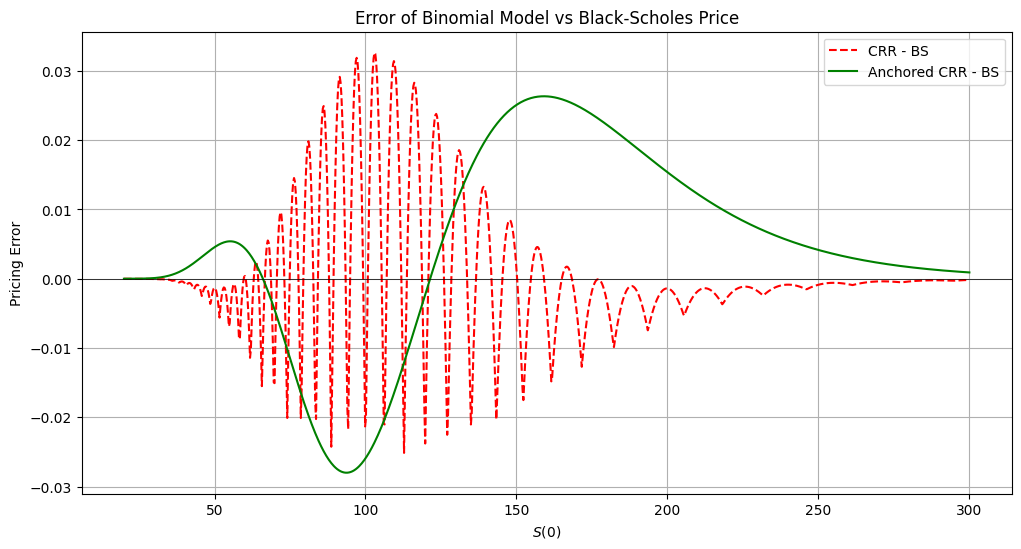

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(S, errors, label="CRR - BS", linestyle="--", color="red")
plt.plot(S, errors_1, label="Anchored CRR - BS", linestyle="-", color="green")
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel("$S(0)$")
plt.ylabel("Pricing Error")
plt.title("Error of Binomial Model vs Black-Scholes Price")
plt.legend()
plt.grid(True)
plt.show()

## Interpretation

The approximation error of the CRR model with $M = 100$ as an approximation of the Black-Scholes model is comparably large for the strike-anchored and the non-strike anchored version of the model. For initial stock prices above 65, the absolute approximation error is below 1% of the true Black-Scholes price, which is an acceptable accuracy. However, the approximation error of the non-strike anchored version has a strongly oscillating behaviour while the error of the strike-anchored version varies smoothly with the initial stock price. A resulting possible advantage of the strike-anchored version is that the calculation of sensitivities like the delta of an option (the first derivative of the option price with respect to the current stock price) will be much more accurate with the strike-anchored version than with the non-anchored version.



In [15]:
# errors_1=np.zeros_like(S)

# for i in range(1000):
#     errors_1[i]=call_prices_CRR_anchored[i]-call_prices_BS[i]


# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(S, errors_1, label='European Call Option Price', color='blue')
# plt.title('European Call Prices Of Parameterized BT and BS model Error  vs Stock')
# plt.xlabel(r'Values Of Stocks')
# plt.ylabel('Call Option Price')
# plt.legend()
# #plt.grid(True, alpha=0.3)
# plt.show()
# #errors
# # Interpretation: ...

<br><br>

## Step 2: Computing option prices via integration

Since we have explicit knowledge of the density of $S(T)$ in the Black-Scholes model, we can also price options with arbitrary payoffs by numerically evaluating integrals as detailed in pp. 26 - 27 in the lecture notes. Integrals of the form $\int_a^b g(x) dx$ can be evaluated in Python using the scipy.integrate command `quad(g, a, b)[0]`. The lower and upper bounds `a` and `b` can also be set to `-np.inf` or `np.inf`.

**Task 2.1**: Write a function `european_integration(t, f, St, T, r, sigma)` that computes the price $V(t)$ of an option with terminal payoff $f(S(T))$ via the pricing-by-integration approach in the Black-Scholes model (see the formula for $V(t)$ on the top of page 27. It should take the payoff function $f$ as an input argument.

In [16]:
#help(quad)

In [17]:
# def european_integration(t, f, St, T, r, sigma):
#     tau = T - t  # time to maturity

#     def integrand(z):
#         ST = St * np.exp((r - 0.5 * sigma**2) * tau + sigma * np.sqrt(tau) * z)
#         return f(ST) * np.exp(-0.5 * z**2)

#     integral_value = quad(integrand, -np.inf, np.inf)[0]
#     Vt = np.exp(-r * tau) / np.sqrt(2 * np.pi) * integral_value
#     return Vt

# # # Example usage: European call option with strike K = 100
# # K = 100
# # call_payoff = lambda ST: np.maximum(ST - K, 0)

# # # Parameters
# # r = 0.02
# # sigma = 0.3
# # T = 1
# # K = 100
# # S0 = 120  

# # # Compute price
# # call_price = european_integration(t, call_payoff, St, T, r, sigma)
# # print(f"Call option price via integration: {call_price:.4f}")


### Computing price of European call option using Integration method

In [18]:
def european_integration(t, f, St, T, r, sigma):

    def integrand(x):
        ST=St * ( np.exp ( ( r- (sigma**2) / 2 ) * ( T - t ) + ( sigma * ( np.sqrt ( T - t ) ) * x ) ) )
        return f(ST) * ( np.exp( ( x**2 ) * ( - 0.5 ) ) )
    integral_value=quad(integrand, -np.inf, np.inf)[0]
    Vt=np.exp(-r * (T - t)) / np.sqrt(2 * np.pi) * integral_value
    #integrand=f(St*(np.exp((r-(sigma**2)/2)*(T-t))+(sigma*(np.sqrt(T-t))*x)))*(np.exp(((-x)**2)/2))
    return Vt

**Task 2.2**: Write a function `f_call` that computes the terminal payoff of a European call option with strike $K = 100$ as a function of $S(T)$. Afterwards compute the price $V_{\mathrm{Int}}(0)$ of a European call option in the Black-Scholes model using all input variables as set in the beginning of this notebook. Store the output in a variable `call_price_int`.

*Useful Python commands*: `np.maximum`

### Computing price of European call option using Integration method

In [19]:
# ### formula for put option

# def f_put(S):
#     #dim=((M+1),(M+1))
#     #S = np.zeros(dim)
#     K=100
#     return np.maximum((K-S),0)

In [20]:
def f_call(S):
    #dim=((M+1),(M+1))
    #S = np.zeros(dim)
    K=100
    return np.maximum((S-K),0)

t=0
St=S0
call_price_int = european_integration(t, f_call, St, T, r, sigma)

In [21]:
call_price_int

np.float64(26.803371401773845)

### Computing relative absolute error between the price computed by BS model and Integration method

**Task 2.3**: Compute the some European call option price as in Task 2.2, but this time using your closed-form function `european_BS` from Task 1.5. Store the output $V_{\mathrm{BS}}(0)$ in a variable `reference_price_BS`. Afterwards, compute the relative absolute error $\frac{|V_{\mathrm{BS}}(0) - V_{\mathrm{Int}}(0)|}{V_{\mathrm{BS}}(0)}$ and print it to the console.

*Useful Python commands*: `np.abs`

In [22]:
call=1
reference_price_BS = european_BS(t, St, K, T, r, sigma, call)
relative_absolute_error = (np.abs(reference_price_BS-call_price_int))/reference_price_BS

In [23]:
relative_absolute_error

np.float64(1.8188443726216035e-09)

## Execution Time Computation

<br><br>

## Step 3: Computation of power call prices and comparison of calculation times 

We now have gathered three different approaches to compute European option prices in the Black-Scholes model:

- **Using the Black-Scholes formula**: The closed-form formula gives the most accurate results and is very fast but is limited to simple payoff functions.
- **Using a binomial model**: This is completely flexible regarding the payoff function as long as the payoff is not path-dependent and it also handles American options easily. It is however just an approximation to the Black-Scholes model and $M$ must be chosen large in order to get accurate results.
- **Using pricing by integration**: This is completely flexible regarding the payoff function as long as the payoff is not path-dependent but it cannot handle American options. It is however faster and more accurate than the binomial model.

Our goal is now to test *how much faster* the pricing by integration approach is compared to the binomial model. We'd like to test this by pricing so-called *power-call options* that have a terminal payoff $f(S(T)) = (S(T)^\alpha - K)^+$ for some $\alpha > 0$ (see also Exercise 01.2 on theoretical Exercise Sheet 01).

**Task 3.1**: Set $\alpha = 1.2$. Then, write a function `f_powercall(S)` that calculates the payoff of the power call option as a function of $S(T)$.

*Useful Python commands*: `np.maximum`

In [24]:
def f_powercall(S):
    alpha = 1.2
    #dim=((M+1),(M+1))
    #S = np.zeros(dim)
    #K=100
    return np.maximum(((S**alpha)-K),0)

We now want to measure the calculation time of evaluating your function `european_integration` from Task 2.1. As detailed in the `Python Introduction.ipynb` notebook file, the execution time of a Jupyter Notebook cell can be measured by writing `%%time` at the beginning of the cell. We want to get an even more accurate measure of execution time by using instead `%%timeit -n 20 -r 3`: Writing this line at the beginning of the cell calculates the average calculation time over 20 independent executions of the cell code, then it repeats the whole loop 3 times and prints out the average and the standard deviation of the calculation time out of the 3 runs.

**Task 3.2**: Calculate the price $V(0)$ of the European power call with $\alpha=1.2$ by using your function `european_integration`. Write `%%timeit -n 20 -r 3` at the beginning of the cell to measure the execution time.

In [25]:
%%timeit -n 20 -r 3
vt_power_INT=european_integration(t, f_powercall, St, T, r, sigma)

1.4 ms ± 64.5 μs per loop (mean ± std. dev. of 3 runs, 20 loops each)


**Task 3.3**: Repeat Task 3.2 but use the function `european_CRR` with `M=1000` instead of the function `european_integration`. Measure the execution time in the same way as in Task 3.2.

In [26]:
%%timeit -n 20 -r 3
M=1000
vt_power_BT=european_CRR(f_powercall, S0, T, r, sigma, M)

940 ms ± 1.45 ms per loop (mean ± std. dev. of 3 runs, 20 loops each)


In [27]:
# note if we use %%timeit -n 20 -r 3 in any cell before initialiging a variable then that vi=ariable is not initialized and thats why we are getting this error 
# vt_power_INT is not defined
#vt_power_INT 

The function `european_CRR` as set up in Week 02 is not very optimized and is over 100 times slower than the `european_integration` method. It can however be optimized to yield faster results: Since only the final column of the stock price matrix in the binomial model is needed to calculate option payoff, it is unnecessary to calculate and store all the other columns.

**Task 3.4 (Optional)**:  Write a new function `european_CRR_optimized(g, S0, T, r, sigma, M)` that yields the same output as the function `european_CRR` but try to achieve a smallest possible execution time by optimizing the calculations within the function. Our own benchmark with `M=1000`: `3.76 ms ± 37.6 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)`

In [32]:
def european_CRR_optimized(g, S0, T, r, sigma, M): 
    delta_t = T / M
    beta = 0.5 * (np.exp(-r * delta_t) + np.exp((r + sigma**2) * delta_t))
    u = beta + np.sqrt(beta**2 - 1)
    d = beta - np.sqrt(beta**2 - 1)
    q = (np.exp(r * delta_t) - d) / (u - d)
    discount = np.exp(-r * delta_t)

    # Stock prices at maturity (vectorized)
    j = np.arange(M + 1)
    ST = S0 * (u ** j) * (d ** (M - j))

    # Option values at maturity
    V = g(ST)

    # Backward induction (rolling array)
    for i in range(M - 1, -1, -1):
        V = discount * (q * V[1:i+2] + (1 - q) * V[0:i+1])

    return V[0]


In [33]:
%%timeit -n 20 -r 3
M=1000
vt_power_BT_optimized=european_CRR_optimized(f_powercall, S0, T, r, sigma, M)

3.85 ms ± 33.5 μs per loop (mean ± std. dev. of 3 runs, 20 loops each)


<br><br>

## Step 4: Delta hedging a European call option on the DAX index

In the `data` subfolder of the `my_materials` folder, you'll find a file called `DAX_sample.csv`. It contains daily close prices $S(t_i)$, $i \in \{1, \dots, 255\}$ of the German DAX index between 01 February 2023 and 31 January 2024 (255 trading days). 

**Task 4.1**: Import the time series of DAX prices from the file `DAX_sample.csv` and plot it.

*Useful Python commands*: `np.loadtxt`

In [34]:
DAX_prices = np.loadtxt('/home/jovyan/shared_materials/data/DAX_sample.csv',delimiter=',')

In [35]:
#DAX_prices

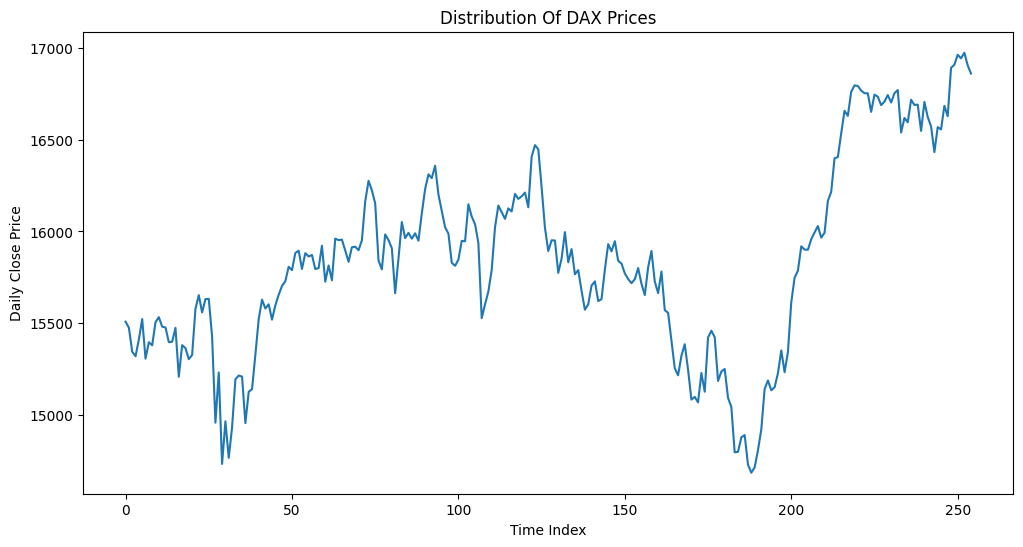

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(DAX_prices)
plt.title('Distribution Of DAX Prices')
plt.xlabel('Time Index')
plt.ylabel('Daily Close Price')
plt.show()

## calculate price of european call option using BS model

Suppose that we want to hedge a European call option on the DAX with strike $K = 16000$ that is issued on 01 February 2023 and expires on 01 February 2024. That is, we want to set up a portfolio of the DAX and of a zero-coupon bond that tracks the European call option price over time as close as possible.

**Task 4.2**: Calculate the European call option prices $V(t)$, $t =  t_i \in \{0, \frac{1}{255}, \frac{2}{255}, \dots, \frac{254}{255}\}$ on the DAX index. For simplicity, use a Black-Scholes model with your function `european_BS` from Task 1.5. Set $r$ to the EURIBOR rate 0.03316 of 01 February 2023. The parameter $\sigma$ is supposed to be set to $\sqrt{255}$ times the empirical standard deviation of the daily log-returns $\log(S(t_{i + 1})) - \log(S(t_i)$ of the DAX timeseries. Store the option prices in an array `call_prices_DAX`.

*Useful Python commands*: `np.diff`, `np.log`, `np.std`, `np.sqrt`

In [37]:
# def european_BS(S, K, r, sigma, T):
#     d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
#     d2 = d1 - sigma * np.sqrt(T)
#     return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

## Important note to create Time_To_Maturity array :

t=0: issuance date (01 Feb 2023)

t= 254/255 : the day before maturity (31 Jan 2024)

𝑡 = 𝑖/255 : represents elapsed time since issuance

But for Black-Scholes, we need time to maturity T−t. So:

time_to_maturity[𝑖] =1 − 𝑖/255
​
 

This will go from:

𝑇_0 = 1 − 0

𝑇_1 = 1 − 1/255

...

𝑇_254 = 1 − 254/255 = 1


In [38]:
# def european_BS(t, St, K, T, r, sigma, call):
#     d1=(np.log(St/K) + r*(T-t) + ((sigma**2)/2)*(T-t))/(sigma*np.sqrt(T-t))
#     d2=(np.log(St/K) + r*(T-t) - ((sigma**2)/2)*(T-t))/(sigma*np.sqrt(T-t))
#     if call ==1:
#         vt_call= (St*(norm.cdf(d1)))-(K*(np.exp(-r*(T-t)))*(norm.cdf(d2)))
#         return vt_call
#     elif call==0:
#         vt_put= (K*(np.exp(-r*(T-t)))*(norm.cdf(-d2))) - (St*(norm.cdf(-d1)))
#         return vt_put

## Previous code

In [39]:
def european_BS_call(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

In [41]:
n_days = len(DAX_prices)
n_days

255

In [42]:
# Constants
K = 16000  # strike
r = 0.03316  # EURIBOR rate
n_days = len(DAX_prices)


# Calculate daily log returns
log_returns = np.diff(np.log(DAX_prices))

# Annualized volatility
sigma = np.std(log_returns) * np.sqrt(255)

# Time array (in years)
time_to_maturity = 1- np.arange(255) / 255

#time_to_maturity = np.arange(255) / 255

# Underlying prices (drop last one since we lose 1 return) because we are calculating difference of daily log returns
S = DAX_prices

# Compute call prices using Black-Scholes
call_prices_DAX = np.array([european_BS_call(S[i], K, r, sigma, time_to_maturity[i]) 
                            for i in range(n_days)])


In [43]:
sigma = np.std(log_returns) * np.sqrt(255)
sigma

np.float64(0.12666149230651214)

In [45]:
call_prices_DAX[:20]

array([798.0042159 , 778.21304584, 709.07791681, 694.2827161 ,
       737.48942064, 793.0239993 , 680.72283563, 722.62941222,
       711.7225761 , 773.8953411 , 785.81969213, 756.10483101,
       751.27327836, 707.93802883, 706.59664288, 742.74713362,
       610.15350702, 689.92852302, 679.39047069, 647.70679631])

In [46]:
# call_prices_DAX = np.array([european_BS(S[i], K, r, sigma, T, time_to_maturity[i],call) for i in range(n_days-1)])

In [47]:
#call_prices_DAX

## calculate delta of the sf portfolio at each time point that is how much proportion of share should we buy using the money comes from bond

We are now ready to set up the hedging portfolio. In equation (3.30) in the lecture notes it is shown that a European option in the Black-Scholes model can be replicated by setting up a self-financing portfolio that holds $\partial_2 v(t, S(t))$ shares of the underlying at each point in time, where $v(t, S(t)) = V(t)$ is the option pricing function. The number $\partial_2 v(t, S(t))$ is called the *delta* of the option. For European call options in the Black-Scholes model, the delta can be easily calculated as \begin{equation} \partial_2 v(t, S(t)) = \Phi(d_1),\end{equation} where $d_1$ is as in equation (3.24).

**Task 4.3**: Write a function `delta_call_BS(t, St, K, T, r, sigma)` that calculates the delta of a European call option in the Black-Scholes model at time $t$.

*Useful Python commands*: `np.log`, `np.sqrt`, the standard normal cdf $\Phi$ can be accessed by the scipy.stats function `norm.cdf(...)`.

In [48]:
# def delta_call_BS(t, St, K, T, r, sigma):
#     d1 = (np.log(St / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
#     return norm.cdf(d1)


In [49]:
def delta_call_BS(St, K, T, r, sigma):
    d1=( np.log ( St/K ) + r * T + ( ( sigma**2 ) / 2 ) * T ) / ( sigma * np.sqrt(T))
    delta=norm.cdf(d1)
    return delta

**Task 4.4**: Calculate the delta $\delta(t) := \partial_2 v(t, S(t))$ of the call option at each point $t = t_i \in \{0, \frac{1}{255}, \frac{2}{255}, \dots, \frac{254}{255}\}$ using your function `delta_call_BS` and store the result in an array `delta_DAX`. Afterwards, plot the delta values over time and interpret your result using a comment.

In [50]:
#t=np.linspace(0,1/255,255)
St=DAX_prices
delta_DAX = np.array([delta_call_BS(St[i], K, time_to_maturity[i], r, sigma) for i in range(n_days)])


#plt.show()

# Interpretation: ...

In [51]:
delta_DAX [:20]

array([0.53154441, 0.5244413 , 0.49721371, 0.49152513, 0.50982947,
       0.5322052 , 0.48724663, 0.50529243, 0.5012969 , 0.52687915,
       0.53205314, 0.5209018 , 0.51949799, 0.50228371, 0.50224283,
       0.51765839, 0.46084315, 0.49676702, 0.49277103, 0.47940025])

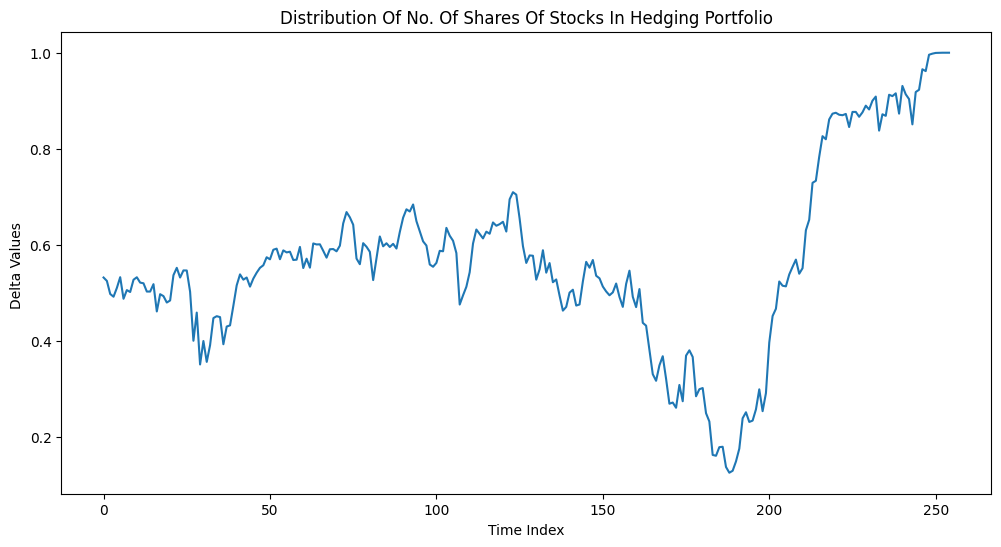

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(delta_DAX)
plt.title('Distribution Of No. Of Shares Of Stocks In Hedging Portfolio')
plt.xlabel('Time Index')
plt.ylabel('Delta Values ')
plt.show()

### Interpretation:

#### Delta starts low and increases as the option becomes more in-the-money or nears expiry.

Since the hedging portfolio can in reality not be rebalanced continuously, we have to rebalance it once every day: The investor makes sure at every day $t_i$ to hold $\delta(t_i)$ shares of the stock. The necessary money to fund these purchases are drawn from the bond investment to make the portfolio self-financing.

**Task 4.5**: Define to arrays `stock_investment` and `bond_investment` of length 255 containing zeros. Fill the first entry of the two arrays by the initial investment of the replicating portfolio in the stock and in the bond, given by $\varphi_1(0) S(0) = \delta(0) S(0)$ and $\varphi_0(0) B(0) = V(0) - \varphi_1(0)$, respectively.

*Useful Python commands*: `np.zeros`

## how much we should invest in stock and bond

In [56]:
stock_investment = np.zeros(255)
bond_investment = np.zeros(255)
stock_investment[0] = delta_DAX[0] * DAX_prices[0]
bond_investment[0] = call_prices_DAX[0]- stock_investment[0]

In [57]:
stock_investment[0] 
#bond_investment[0]

np.float64(8243.82320380744)

**Task 4.6**: Use a for-loop to successively calculate the following entries of `stock_investment` and `bond_investment` at the remaining time points $t_i \in \{\frac{1}{255}, \frac{2}{255}, \dots, \frac{254}{255}\}$. The stock investment at time $t_i$ is given by $\delta(t_i) S(t_i)$. The current bond investment $b(t_i)$ at time $t_i$ is given by $b(t_i) = b(t_{i-1}) e^{r \Delta t} - (\delta(t_i) - \delta(t_{i-1})) S(t_i)$.

In [58]:
dt=1/255
for i in range(1, 255):
    stock_investment[i] = delta_DAX[i] * DAX_prices[i]
    bond_investment[i] = bond_investment[i-1] * np.exp( r *  dt ) - ( ( delta_DAX[i] - delta_DAX[i-1]) * DAX_prices[i] )

In [59]:
stock_investment[:10]

array([8243.82320381, 8116.47909153, 7630.1968669 , 7530.59755236,
       7857.51727079, 8261.64480051, 7458.76159114, 7780.15941505,
       7710.22709   , 8169.96727401])

In [60]:
bond_investment[:10]

array([-7445.81898791, -7336.85658183, -6919.97857697, -6833.72444873,
       -7116.7205309 , -7464.99386557, -6777.73974893, -7056.47864369,
       -6995.94280431, -7393.53966997])

In [61]:
hedging_portfolio=stock_investment+bond_investment

## Comparision Between BS Call prices and hedging portfolio prices

**Task 4.7**: Plot the whole portfolio value (i.e. the sum of the stock investment and the bond investment) against time. In the same plot window, plot the option prices stored in the array `call_prices_DAX`. Interpret your result using a comment. Why does the portfolio not replicate the option perfectly even though an option can theoretically be hedged perfectly in the Black-Scholes model?

In [62]:
call_prices_DAX[:20]

array([798.0042159 , 778.21304584, 709.07791681, 694.2827161 ,
       737.48942064, 793.0239993 , 680.72283563, 722.62941222,
       711.7225761 , 773.8953411 , 785.81969213, 756.10483101,
       751.27327836, 707.93802883, 706.59664288, 742.74713362,
       610.15350702, 689.92852302, 679.39047069, 647.70679631])

In [63]:
hedging_portfolio[:20]

array([798.0042159 , 779.6225097 , 710.21828992, 696.87310363,
       740.79673989, 796.65093494, 681.02184222, 723.68077136,
       714.28428569, 776.42760405, 789.84989229, 761.40257829,
       758.13480122, 715.66426486, 715.89173409, 753.04898864,
       614.43384327, 692.72436545, 683.72842532, 653.20729277])

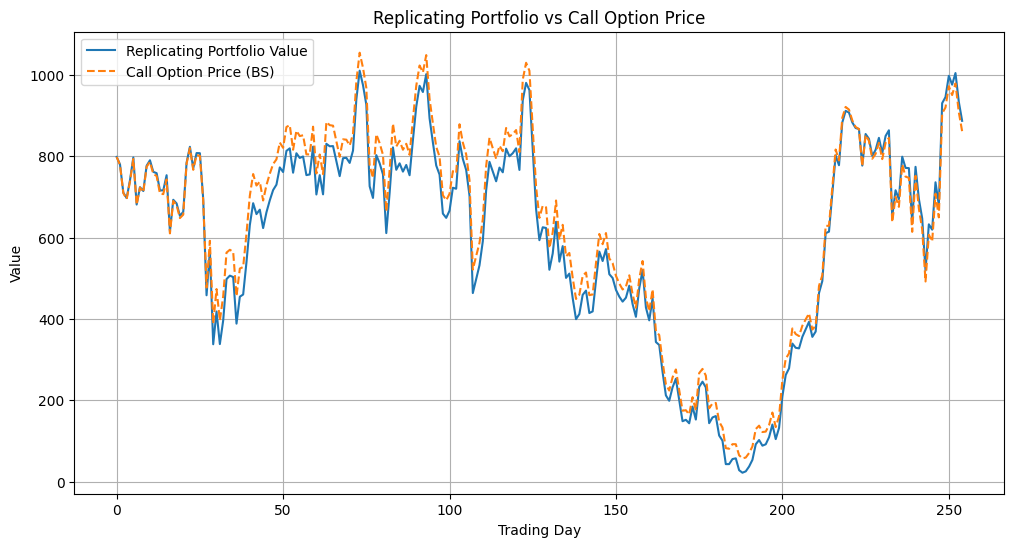

In [64]:
hedging_portfolio = stock_investment + bond_investment

plt.figure(figsize=(12, 6))
plt.plot(hedging_portfolio, label='Replicating Portfolio Value')
plt.plot(call_prices_DAX, label='Call Option Price (BS)', linestyle='--')
plt.title('Replicating Portfolio vs Call Option Price')
plt.xlabel('Trading Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation: ...

## Interpretation : 

Here we are not able to get exact replication because of two main points, one is here we are taking discrete time points whereas in blackscohles model we have continuous time points and we do not know the exact distribution of DAX index what we have used here. Theoritically in BS model Gausian Brownian Motion is there but here do not know the exact distribution of DAX. These are the reasons because of which we are not able to achieve the exact replicated portfolio.  



## Computation Of Delta By Using Pricing By Integration Approach

The delta of an option can also easily be calculated using the pricing-by-integration approach, which has the advantage that one can thus calculate the delta of options with exotic payoffs in the Black-Scholes model. One has to differentiate the option price
\begin{equation} V(t) = \frac{1}{2\pi} \int_{-\infty}^\infty f\Big( S(t) \exp\Big(\big(r - \sigma^2/2\big)(T-t) + \sigma\sqrt{T-t}x\Big)\Big) e^{-r(T-t)} e^{-\frac{x^2}{2}} dx
\end{equation}
by $S(t)$. Assuming that $f$ is differentiable almost everywhere with derivative $f'$ and that differentiation and integration can be interchanged, one obtains
\begin{equation} \frac{\partial}{\partial S(t)}V(t) = \frac{1}{2\pi} \int_{-\infty}^\infty f'\Big( S(t) \exp\Big(\big(r - \sigma^2/2\big)(T-t) + \sigma\sqrt{T-t}x\Big)\Big) \exp\Big(-\frac{\sigma^2}{2}(T-t) + \sigma\sqrt{T-t}x\Big) e^{-\frac{x^2}{2}} dx.
\end{equation}

**Task 4.8 (Optional)**: Write a function `delta_int(t, f, f_prime, St, T, r, sigma)` that takes the payoff `f` and its derivative `f_prime` as function of $S(T)$ as an input, and then calculates the delta of the option with payoff $f$ by computing the above integral numerically.

In [97]:
# def delta_int(t, f_prime, St, T, r, sigma):
#     tau = T - t
#     mu = (r - 0.5 * sigma**2) * tau
#     sdt = sigma * np.sqrt(tau)

#     # Define the integrand
#     def integrand(x):
#         ST = St * np.exp(mu + sdt * x)
#         return f_prime(ST) * np.exp(mu + sdt * x) * np.exp(-0.5 * x**2)

#     # Perform numerical integration from -inf to inf
#     integral, _ = quad(integrand, -10, 10)  # truncate tails for numerical reasons

#     # Final result (note: 1/sqrt(2π) = 1 / (2π) * 2π^0.5)
#     return integral / (2 * np.pi)


In [98]:
# def f_prime_call(ST, K=100):
#     return np.where(ST > K, 1.0, 0.0)

# # Wrapper for quad integration (since f_prime must be callable with scalar input)
# def f_prime_scalar(ST):
#     return f_prime_call(ST)


# St = S0 
# K = 100      
# T = 1       
# t = 0        
# r = 0.05     
# sigma = 0.2  

# delta = delta_int(t, f_prime_scalar, St, T, r, sigma)
# print(f"Delta (pricing-by-integration) = {delta:.6f}")


In [99]:
# def delta_int(t,f_prime, St, T, r, sigma):

#     def integrand(x):
#         ST=St * ( np.exp ( ( r- (sigma**2) / 2 ) * ( T - t ) + ( sigma * ( np.sqrt ( T - t ) ) * x ) ) )
#         return f_prime(ST) * ( np.exp( ( x**2 ) * ( - 0.5 ) ) )
#     integral_value=quad(integrand, -np.inf, np.inf)[0]
#     delta= (np.exp(- ( ( sigma**2 )/2) * (T - t) + ( sigma * ( np.sqrt ( T - t ) ) * x ) ) / (2 * np.pi)) * integral_value
#     #integrand=f(St*(np.exp((r-(sigma**2)/2)*(T-t))+(sigma*(np.sqrt(T-t))*x)))*(np.exp(((-x)**2)/2))
#     return delta

# # K=100
#  #   return np.maximum((S-K),0)
# def f_prime_call(ST, K=100):
#     return np.where(ST > K, 1.0, 0.0)

# def f_prime_scalar(ST):
#     return f_prime_call(ST)


# delta = delta_int(t, f_prime_scalar, St, T, r, sigma)

In [100]:
# def delta_int(t, f, f_prime, St, T, r, sigma):
#     def integrand(x):
#         ST=St * ( np.exp ( ( r- (sigma**2) / 2 ) * ( T - t ) + ( sigma * ( np.sqrt ( T - t ) ) * x ) ) )
#         return f(ST) * ( np.exp( ( x**2 ) * ( - 0.5 ) ) )
    
#     return ...

In [101]:
#delta_call_BS

**Task 4.9 (Optional)**: Test your function `delta_int` for a European call option at time $t=0$ with all other input variables as specified at the beginning of the notebook and compare the result to the theoretical result obtained by evaluating the function `delta_call_BS`. 

<br><br>

## Step 5: Valuation of perpetual American put options

A perpetual American put option is an option contract without expiry that yields the payoff $g(S(t)) = (K − S(t))^+$ at any future time chosen by the holder of the option. Let $x^∗ = \frac{2Kr}{2r+σ^2}$. One can show that the value function $v(S(t))$ of the perpetual American put option in the Black–Scholes model is independent of time and satisfies the boundary problem 
\begin{align} \frac{\sigma^2}{2}x^2 \frac{\partial^2}{\partial x^2} v(x) + rx \frac{\partial}{\partial x}v(x) - rv(x) = 0 \text{ for } x \geq x^*, \\ v(x) = g(x) \text{ for } x \leq x^*. \end{align}

Our goal is to solve this boundary problem numerically using scipy.

**Task 5.1**: Define an array `S_grid` that contains 200 equally spaced points between $10^{-6}$ and `S_max = 200`. Define another array `v_grid` of the same shape as `S_grid` containing zeros. `v_grid` is the array that will in the following tasks be filled with the values $v(S(0))$ of the perpetual American put option for $S(0)$ taking values in `S_grid`. Define also a variable `x_star` containing the value $x^*$ for $K$, $r$ and $\sigma$ as defined at the top of this notebook. Fill all components in `v_grid` that correspond to stock prices $S(0) \leq x^*$ in `S_grid` using the condition $v(x) = g(x) \text{ for } x \leq x^*$ from the boundary problem.

*Useful Python commands*: `np.linspace`, `np.zeros`, `np.zeros_like`, `np.maximum`

## valuation of the option for x<= x_star

In [102]:
S_grid = np.linspace(1e-6,200,200)
v_grid = np.zeros_like(S_grid)
r = 0.02
sigma = 0.3
K = 100
x_star = (2 * K * r )/(2 * r + ( sigma ** 2 ) ) 
v_grid[S_grid <= x_star] = np.maximum(K - S_grid[S_grid <= x_star], 0)

## Visualize payoff region

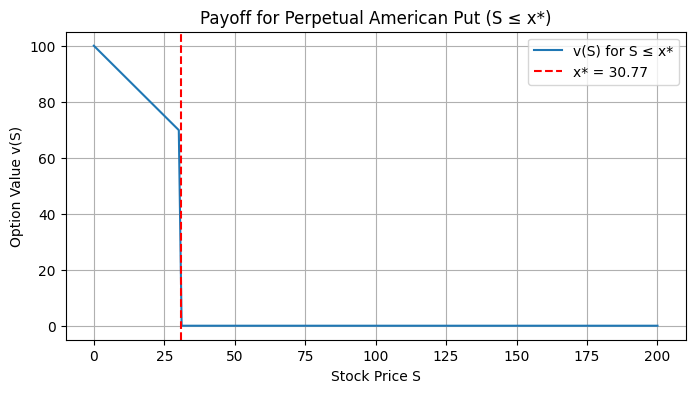

In [103]:
# Optional: Visualize payoff region
plt.figure(figsize=(8, 4))
plt.plot(S_grid, v_grid, label='v(S) for S ≤ x*')
plt.axvline(x_star, color='red', linestyle='--', label=f'x* = {x_star:.2f}')
plt.title('Payoff for Perpetual American Put (S ≤ x*)')
plt.xlabel('Stock Price S')
plt.ylabel('Option Value v(S)')
plt.legend()
plt.grid(True)
plt.show()

## valuation of the option for x>= x_star important

## calculate second order derivatives

scipy is only capable of numerically solving first-order ordinary differential equations (ODE), i.e. ODEs containing only first but no second derivatives. Luckily, we can transform the second-order ODE from the boundary problem above into a 2-dimensional system of first-order ODEs by setting $v_1 := v$, $v_2 := \frac{\partial}{\partial x}v(x)$ and writing
\begin{equation} \frac{\partial}{\partial x} \begin{pmatrix} v_1(x) \\ v_2(x) \end{pmatrix} = \begin{pmatrix} v_2(x) \\ \frac{2r}{\sigma^2 x^2} [v_1(x) - x v_2(x)] \end{pmatrix} \end{equation}

**Task 5.2**: Write a function `ode_fun(x, v)` that takes a scalar `x` and a size-2 numpy array `v` with components $v_1$ and $v_2$ as inputs and returns a size-2 numpy array representing the right hand side of the above first-order system of ODEs.

In [104]:
def ode_fun(x, v) :
    v1, v2 = v
    dv1_dx=v2
    dv2_dx = ((2 * r) / ((sigma ** 2) * ( x ** 2))) * (v1 - x * v2)
    return np.array([dv1_dx, dv2_dx])

**Task 5.3**: Use the scipy.integrate function `solve_ivp` to solve the 2-dimensional system of first-order ODEs represented by your function `ode_fun` for $x \geq x^*$.. To get a smooth solution, use the starting values $v_1(x^*) = g(x^*)$ and $v_2(x^*) = -1$. Fill the entries of `v_grid` corresponding to $S(0) \geq x^*$ with the obtained solution of ODE.

*Useful Python commands* To solve a system of ODEs represented by a function `dy / dt = ode_fun(t, y)` with initial condition `y(t0) = y0` on the interval `(t0, t_end)` and then return the solution evaluated on a grid of points `t_eval` one can use the command `solve_ivp(fun=ode_fun, t_span=(t0, t_end), y0=y0, t_eval=t_eval).y`.

In [105]:
#%%time
# Initial conditions at x_star
v1_init = K - x_star          # v(x*) = g(x*)
v2_init = -1                  # as given
y0 = [v1_init, v2_init]


def ode_fun(x, v):
    v1, v2 = v
    dv1_dx = v2
    dv2_dx = (2 * r / (sigma**2 * x**2)) * (v1 - x * v2)
    return [dv1_dx, dv2_dx]


S_eval = S_grid[S_grid >= x_star]

# Solve the ODE on [x_star, S_max]
sol = solve_ivp(fun=ode_fun, t_span=(x_star, 200), y0=y0, t_eval=S_grid[S_grid >= x_star])

# Fill v_grid for S >= x_star using the ODE solution
v_grid[S_grid >= x_star] = sol.y[0]  # v1 component is the option value

In [106]:
v_grid[-10:]

array([30.7710429 , 30.69937083, 30.62823975, 30.55764446, 30.48758002,
       30.41804175, 30.34902525, 30.28052638, 30.21254126, 30.14506628])

## Self Checking 

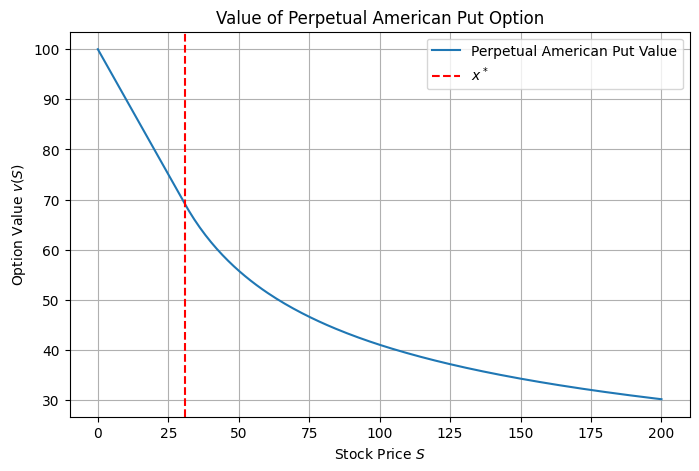

In [107]:
plt.figure(figsize=(8, 5))
plt.plot(S_grid, v_grid, label='Perpetual American Put Value')
plt.axvline(x=x_star, color='red', linestyle='--', label='$x^*$')
plt.xlabel('Stock Price $S$')
plt.ylabel('Option Value $v(S)$')
plt.title('Value of Perpetual American Put Option')
plt.legend()
plt.grid(True)
plt.show()

### comparison Perpetual American put option vs European put option BS

**Task 5.4**: Plot the perpetual American put option prices from the array `v_grid` against the stock prices from the array `S_grid`. Define also an array `v_grid_EU` that contains the European put option prices at $t=0$ in the Black-Scholes model corresponding to the values of $S(0)$ from the array `S_grid` and all other variables as before. Plot these European put prices in the same plot.

## European Put Option BS

In [108]:
def european_put_BS(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2)* T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) +  (r - 0.5 * sigma ** 2) * T )/ (sigma * np.sqrt(T))
    vt_put=K * np.exp(-r * (T)) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return vt_put


In [109]:
#v_grid_EU_1=np.zeros_like(S_grid)

In [110]:
#v_grid_EU_1 = european_BS_put(S_grid, K, T, r, sigma)

In [111]:
v_grid_EU_2 = european_put_BS(S_grid, K, T, r, sigma)

In [112]:
v_grid_EU_2[-10:]

array([0.18619268, 0.1775309 , 0.16927114, 0.16139494, 0.15388468,
       0.14672353, 0.13989541, 0.13338497, 0.12717755, 0.12125915])

In [113]:
# def european_BS(t, St, K, T, r, sigma, call):
#     d1=(np.log(St/K) + r*(T-t) + ((sigma**2)/2)*(T-t))/(sigma*np.sqrt(T-t))
#     d2=(np.log(St/K) + r*(T-t) - ((sigma**2)/2)*(T-t))/(sigma*np.sqrt(T-t))
#     if call ==1:
#         vt_call= (St*(norm.cdf(d1)))-(K*(np.exp(-r*(T-t)))*(norm.cdf(d2)))
#         return vt_call
#     elif call==0:
#         vt_put= (K*(np.exp(-r*(T-t)))*(norm.cdf(-d2))) - (St*(norm.cdf(-d1)))
#         return vt_put

In [114]:
K

100

In [115]:
r

0.02

In [116]:
sigma

0.3

## Plot of Perpetual American vs. European put values

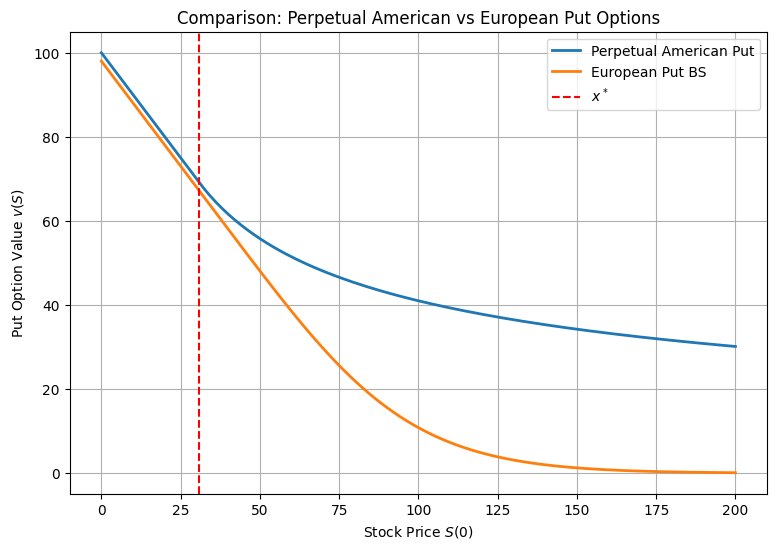

In [118]:
# Compute European put prices
v_grid_EU = european_put_BS(S_grid, K, T, r, sigma)


plt.figure(figsize=(9, 6))
plt.plot(S_grid, v_grid, label='Perpetual American Put', linewidth=2)
plt.plot(S_grid, v_grid_EU_2, label='European Put BS', linewidth=2)
plt.axvline(x=x_star, color='red', linestyle='--', label='$x^*$')
plt.xlabel('Stock Price $S(0)$')
plt.ylabel('Put Option Value $v(S)$')
plt.title('Comparison: Perpetual American vs European Put Options')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation: ...

## Interpretation :


1. The perpetual American put (solid line) should always be at least as valuable as the European put (dashed line), since it allows for optimal early exercise without expiry.

2. For deep in-the-money (low S) cases, the early exercise feature becomes especially valuable, causing a larger gap between American and European prices.